In [1]:
# import the necessary modules to complete the assignment
import math
import random
import urllib2
import numpy as np
import string
import matplotlib.pyplot as plt
# This student created file contains the functions to compute the Scoring Matrix, the Dynamic Programming Alignment table 
# as well as the Local and Global Alignments.
import DP_Interface as student

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"

In [3]:
# Code provided by the course for uploading necessary files
def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict

def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq

###Question 1 (2 pts)

First, load the files HumanEyelessProtein and FruitflyEyelessProtein using the provided code. These files contain the amino acid sequences that form the eyeless proteins in the human and fruit fly genomes, respectively. Then load the scoring matrix PAM50 for sequences of amino acids. This scoring matrix is defined over the alphabet {𝙰,𝚁,𝙽,𝙳,𝙲,𝚀,𝙴,𝙶,𝙷,𝙸,𝙻,𝙺,𝙼,𝙵,𝙿,𝚂,𝚃,𝚆,𝚈,𝚅,𝙱,𝚉,𝚇,-} which represents all possible amino acids and gaps (the "dashes" in the alignment).

Next, compute the local alignments of the sequences of HumanEyelessProtein and FruitflyEyelessProtein using the PAM50 scoring matrix and enter the score and local alignments for these two sequences below. Be sure to clearly distinguish which alignment is which and include any dashes ('-') that might appear in the local alignment. This problem will be assessed according to the following two items:

- Is the score of the local alignment correct? (Hint: The sum of the decimal digits in the score is 20.)
- Are the two sequences in the local alignments (with dashes included if inserted by the algorithm) clearly distinguished and correct?


In [18]:
# use the provided code to load the proteins into the respective variables
human = read_protein(HUMAN_EYELESS_URL)
fly = read_protein(FRUITFLY_EYELESS_URL)

In [19]:
# use the provided code to load the Scoring Matrix
M = read_scoring_matrix(PAM50_URL)

In [6]:
# investigate the first few keys of the loaded scoring matrix
keys = M.keys()
for key in keys[0:3]:
    print key, M[key]
    print

- {'-': -100, 'A': -5, 'C': -5, 'B': -5, 'E': -5, 'D': -5, 'G': -5, 'F': -5, 'I': -5, 'H': -5, 'K': -5, 'M': -5, 'L': -5, 'N': -5, 'Q': -5, 'P': -5, 'S': -5, 'R': -5, 'T': -5, 'W': -5, 'V': -5, 'Y': -5, 'X': -5, 'Z': -5}

A {'-': -5, 'A': 5, 'C': -5, 'B': -2, 'E': -1, 'D': -2, 'G': -1, 'F': -7, 'I': -3, 'H': -5, 'K': -5, 'M': -4, 'L': -5, 'N': -2, 'Q': -3, 'P': 0, 'S': 0, 'R': -5, 'T': 0, 'W': -11, 'V': -1, 'Y': -6, 'X': -2, 'Z': -2}

C {'-': -5, 'A': -5, 'C': 9, 'B': -9, 'E': -11, 'D': -11, 'G': -7, 'F': -10, 'I': -5, 'H': -6, 'K': -11, 'M': -11, 'L': -12, 'N': -8, 'Q': -11, 'P': -6, 'S': -2, 'R': -6, 'T': -6, 'W': -13, 'V': -5, 'Y': -3, 'X': -7, 'Z': -11}



In [7]:
# Create the Dynamic Programming alignment matrix using the compute_alignment_matrix method in the "student" file you wrote 
# for this assignment. Set the flag to False since this will be used to compute the local alignment.
S = student.compute_alignment_matrix(human, fly, M, False)

In [8]:
# Calculate the local alignment score as well as the local alignments for the human and fruitfly proteins 
score1, human_local1, fly_local1 = student.compute_local_alignment(human, fly, M, S)
print "The resulting local alignemnt score is {}.".format(score1)
print
print "Human local alignment sequence:"
print human_local1
print
print "Fruitfly local alignment sequence:"
print fly_local1

The resulting local alignemnt score is 875.

Human local alignment sequence:
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ

Fruitfly local alignment sequence:
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


###Question 2 (2 pts)

To continue our investigation, we next consider the similarity of the two sequences in the local alignment computed in Question 1 to a third sequence. The file ConsensusPAXDomain contains a "consensus" sequence of the PAX domain; that is, the sequence of amino acids in the PAX domain in any organism. In this problem, we will compare each of the two sequences of the local alignment computed in Question 1 to this consensus sequence to determine whether they correspond to the PAX domain.

Load the file ConsensusPAXDomain. For each of the two sequences of the local alignment computed in Question 1, do the following:

- Delete any dashes '-' present in the sequence.
- Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.
- Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of elements in these two sequences that agree.

To reiterate, you will compute the global alignments of local human vs. consensus PAX domain as well as local fruitfly vs. consensus PAX domain. Your answer should be two percentages: one for each global alignment. Enter each percentage below. Be sure to label each answer clearly and include three significant digits of precision.



In [9]:
# use the provided code to load the CONCENSUS PAX DOMAIN protein
pax = read_protein(CONSENSUS_PAX_URL)

In [10]:
# Remove the Dashes from the Human and Fly local pair alignments
human_local2 = "".join([letter for letter in human_local1 if letter != "-"])
fly_local2  = "".join([letter for letter in fly_local1 if letter != "-"])

In [11]:
# Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.
# First compute the global alignment of the dash-less human sequence with the pax protein
score2_human, human_global1, pax_global1 = student.compute_global_alignment(human_local2, pax, M, S)

In [12]:
# Next compute the global alignment of the dash-less human sequence with the pax protein
score2_fly, fly_global1, pax_global2  = student.compute_global_alignment(fly_local2, pax, M, S)

In [13]:
# Compute the percentage of elements that agree between the Human and Pax Global sequences
hp_counter = 0
for idx in range(len(pax_global1)):
    if human_global1[idx] == pax_global1[idx]:
        hp_counter += 1
hp_ans = (float(hp_counter) / len(human_global1)) * 100
print "{} element(s) align between the two sequences.".format(hp_counter)
print "Out of a total of {} elements only {}% of elements agree beteween the Human Global and PAX Global sequences.".format(idx,round(hp_ans,3))

1 element(s) align between the two sequences.
Out of a total of 252 elements only 0.395% of elements agree beteween the Human Global and PAX Global sequences.


In [14]:
# Compute the percentage of elements that agree between the Fly and Pax Global sequences
fp_counter = 0
for idx in range(len(fly_global1)):
    if fly_global1[idx] == pax_global2[idx]:
        fp_counter += 1
fp_ans = (float(fp_counter) / len(fly_global1)) * 100
print "{} element(s) align between the two sequences.".format(fp_counter)
print "Out of a total of {} elements only {}% of elements agree beteween the Human Global and PAX Global sequences.".format(idx,round(fp_ans,3))

1 element(s) align between the two sequences.
Out of a total of 253 elements only 0.394% of elements agree beteween the Human Global and PAX Global sequences.


###Question 3 (1 pt)

Examine your answers to Questions 1 and 2. Is it likely that the level of similarity exhibited by the answers could have been due to chance? In particular, if you were comparing two random sequences of amino acids of length similar to that of HumanEyelessProtein and FruitflyEyelessProtein, would the level of agreement in these answers be likely? To help you in your analysis, there are 23 amino acids with symbols in the string ("𝙰𝙲𝙱𝙴𝙳𝙶𝙵𝙸𝙷𝙺𝙼𝙻𝙽𝚀𝙿𝚂𝚁𝚃𝚆𝚅𝚈𝚇𝚉"). 

Include a short justification for your answer.

** It is entirely possible that this 0.395% similarity is due to chance.  This can be determined by looking at what the probabilty would be for two elements to align at random.  For example, given that there are 23 elements, there is a one in 23 chance (~4%) that at any two elements in each of the two sequences will align at random.  The global fly sequence is 254 letters along and the global human sequence is 253 letters long.  In each case, given a 4% probablity of matching letters with the global pax concensus alignment, there should be approximately 10 or 11 letters that match in each case (.04 x 254 ~ 10).  However, the two sequences we computed only have one letter each that match the corresponding Global Pax Alignment.  For this reason, it is quite possible - even likely - that the observed similarity  is due to chance **

###Hypothesis testing

One weakness of our approach in Question 3 was that we assumed that the probability of any particular amino acid appearing at a particular location in a protein was equal. In the next two questions, we will consider a more mathematical approach to answering Question 3 that avoids this assumption. In particular, we will take an approach known as statistical hypothesis testing to determine whether the local alignments computed in Question 1 are statistically significant (that is, that the probability that they could have arisen by chance is extremely small).



###Question 4 (2 pts)

** Write a function *generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials)* that takes as input: **

1. two sequences 𝚜𝚎𝚚_𝚡 and 𝚜𝚎𝚚_𝚢, 

2. a scoring matrix 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡,

3. a number of trials 𝚗𝚞𝚖_𝚝𝚛𝚒𝚊𝚕𝚜. 

4. This function should return a dictionary 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 that represents an un-normalized distribution generated by performing the following process 𝚗𝚞𝚖_𝚝𝚛𝚒𝚊𝚕𝚜 times:

** Perform the following:**
- Generate a random permutation 𝚛𝚊𝚗𝚍_y of the sequence 𝚜𝚎𝚚_𝚢 using 𝚛𝚊𝚗𝚍𝚘𝚖.𝚜ample().
- Compute the maximum value 𝚜𝚌𝚘𝚛𝚎 for the local alignment of 𝚜𝚎𝚚_𝚡 and randy using the score matrix 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡.
- Increment the entry 𝚜𝚌𝚘𝚛𝚎 in the dictionary 𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 by one.

Use the function 𝚐𝚎𝚗𝚎𝚛𝚊𝚝𝚎_𝚗𝚞𝚕𝚕_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 to create a distribution with 1000 trials using the protein sequences HumanEyelessProtein and FruitflyEyelessProtein (using the PAM50 scoring matrix). Important: Use HumanEyelessProtein as the first parameter 𝚜𝚎𝚚_𝚡 (which stays fixed) and FruitflyEyelessProtein as the second parameter 𝚜𝚎𝚚_𝚢 (which is randomly shuffled) when calling 𝚐𝚎𝚗𝚎𝚛𝚊𝚝𝚎_𝚗𝚞𝚕𝚕_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗. Switching the order of these two parameters will lead to a slightly different answers for question 5 that may lie outside the accepted ranges for correct answers.

Next, create a bar plot of the normalized version of this distribution using 𝚙𝚕𝚝.𝚋𝚊𝚛 in 𝚖𝚊𝚝𝚙𝚕𝚘𝚝𝚕𝚒𝚋 (or your favorite plotting tool). (You will probably find CodeSkulptor too slow to do the required number of trials.) The horizontal axis should be the scores and the vertical axis should be the fraction of total trials corresponding to each score. As usual, choose reasonable labels for the axes and title. Note: You may wish to save the distribution that you compute in this Question for later use in Question 5.

Once you have created your bar plot, upload your plot in the peer assessment. Please review the class guidelines for formatting and comparing plots on the "Creating, formatting, and comparing plots" class page. These guidelines cover the basics of good formatting practices for plots. Your plot will be assessed based on the answers to the following two questions:

Does the plot follow the formatting guidelines for plots?
Is the shape of the plot correct?

In [15]:
# write a function that returns a dictionary 𝚜𝚌𝚘𝚛𝚒𝚗𝚐𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 that represents an un-normalized distribution 
# generated by performing the following process 𝚗𝚞𝚖𝚝𝚛𝚒𝚊𝚕𝚜 times:
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials):
    scoring_distribution = {}
    for trial in range(num_trials):
        rand_y = "".join(random.sample(seq_y, len(seq_y)))
        _S_ = student.compute_alignment_matrix(seq_x, rand_y, scoring_matrix, 0)
        max_score = 0
        for _row_idx in range(len((_S_))-1,0,-1):
            current_score = max(_S_[_row_idx])
            if current_score > max_score:
                max_score = current_score
        scoring_distribution[max_score] = scoring_distribution.get(max_score,0) + 1
    return scoring_distribution

In [16]:
# Use the function 𝚐𝚎𝚗𝚎𝚛𝚊𝚝𝚎_𝚗𝚞𝚕𝚕_𝚍𝚒𝚜𝚝𝚛𝚒𝚋𝚞𝚝𝚒𝚘𝚗 to create a distribution with 1000 trials 
# using the protein sequences HumanEyelessProtein and FruitflyEyelessProtein (using the PAM50 scoring matrix)
score_dist = generate_null_distribution(human,fly, M, 1000)

In [17]:
scores = score_dist.keys()
norm_count = [each/1000. for each in score_dist.values()]

In [20]:
# display the plot inside the ipython notebook
%matplotlib inline

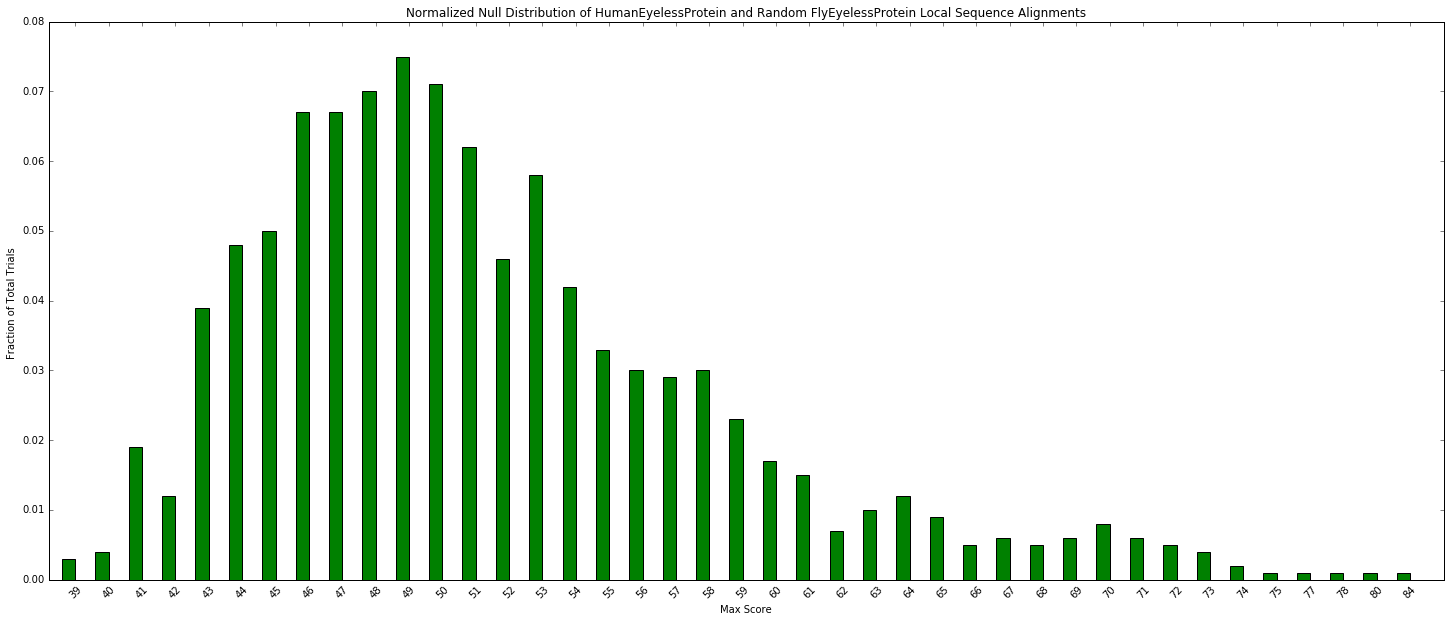

In [21]:
# create a bar plot of the normalized version of this distribution using 𝚙𝚕𝚝.𝚋𝚊𝚛 in 𝚖𝚊𝚝𝚙𝚕𝚘𝚝𝚕𝚒𝚋
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)

## the data
N = len(scores)
x_axis_scores = score_dist.keys()
y_axis_trial_fract = [number/1000. for number in score_dist.values()]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.40                      # the width of the bars

## the bars
#ax.bar(ind, y_axis_trial_fract, width,
#                color='green')
ax.bar(ind, norm_count, width,
                color='green')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,0.08,)
ax.set_xlabel('Max Score')
ax.set_ylabel("Fraction of Total Trials ")
ax.set_title('Normalized Null Distribution of HumanEyelessProtein and Random FlyEyelessProtein Local Sequence Alignments')
#xTickMarks = x_axis_scores
xTickMarks = scores
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)

#yTickMark
#ax.set_yticks()
plt.setp(xtickNames, rotation=45, fontsize=10)


## add a legend
#ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

###Question 5 (2 pts)

Given the distribution computed in Question 4, we can do some very basic statistical analysis of this distribution to help us understand how likely the local alignment score from Question 1 is. To this end, we first compute the mean μ and the standard deviation σ of this distribution via:

$$μ=\frac{1}n\sum_{n=i}s_i$$

$$σ= \sqrt{\frac{1}n\sum_{n=i}(s_i−μ)^2}$$


where the values si are the scores returned by the n trials. If s is the score of the local alignment for the human eyeless protein and the fruitfly eyeless protein, the z-score z for this alignment is

$$z=\frac{s−μ}σ$$

The z-score helps quantify the likelihood of the score s being a product of chance. Small z-scores indicate a greater likelihood that the local alignment score was due to chance while larger scores indicate a lower likelihood that the local alignment score was due to chance.

- What are the mean and standard deviation for the distribution that you computed in Question 4?
- What is the z-score for the local alignment for the human eyeless protein vs. the fruitfly eyeless protein based on these values?

In [22]:
# Calcuate the Mean
def calculate_mean(distro):
        return sum([score * count for score,count in distro.items()])/float(sum(distro.values()))
print "The randomly generated distribution has a mean = {}.".format(calculate_mean(score_dist))

The randomly generated distribution has a mean = 51.574.


In [23]:
# Calculate the Standard Deviation
mean = calculate_mean(score_dist)
def calculate_std_dev(distro,ave):
    return (sum([(((score - ave)**2) * count) for score,count in distro.items()])/float(sum(distro.values())))**0.5
print "For this distribution, the corresponding standard deviation = {}.".format(calculate_std_dev(score_dist,mean))

For this distribution, the corresponding standard deviation = 7.01274012067.


In [24]:
# Calculate the z-score
std = calculate_std_dev(score_dist,mean)
def calculate_z_score(local_score,mean,std_dev):
    return (local_score-mean)/std_dev
print "The local alignment score for the human and fruitly protein has a Z score = {}.".format(calculate_z_score(score1,mean,std))

The local alignment score for the human and fruitly protein has a Z score = 117.418581871.


###Question 6 (1 pt)

For bell-shaped distributions such as the normal distribution, the likelihood that an observation will fall within three multiples of the standard deviation for such distributions is very high.

Based on your answers to Questions 4 and 5, is the score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein due to chance? As a concrete question, which is more likely: the similarity between the human eyeless protein and the fruitfly eyeless protein being due to chance or winning the jackpot in an extremely large lottery? Provide a short explanation for your answers.

In [25]:
# calculate the z-score that corresponds to the probability of winning the Spanish lottery
# this can be determined by obtaining the z-score the corresponds to the area of the curve covered by the 99,998 lottery 
# players who don't win.
from scipy.stats import norm
print "The z-score corresponding to the probablity of winning the Spanish lottery = {}.".format(norm.ppf(1-1./99999))

The z-score corresponding to the probablity of winning the Spanish lottery = 4.26488856114.


** The Z-score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein is 117  standard deviations above the mean.  Given that 99.7% of all observations fall within just +/- 3 standard deviations of the mean, the statistical likelihood that the local alignment score of the two proteins being due to chance is virtually zero.**

** As a point of reference, the likelihood of winning the lottery is far more likely than the simiarlity between the human eyeless protein and the fruitfly eyeless protein being due to chance.  For example, the odds of winning the Spanish Christmas Lottery are 1 in 99,999.  Even this extremely low likelihood results in a Z-score of about 4.26.  Again, given that the local protein alignments for Human and Fruitfly have a Z-Score of 117 indicates there is virtually zero probablity the score is due to chance. **

###Spelling correction

Up to now, we have measured the similarity of two strings. In other applications, measuring the dissimilarity of two sequences is also useful. Given two strings, the edit distance corresponds to the minimum number of single character insertions, deletions, and substitutions that are needed to transform one string into another. In particular, if x and y are strings and a and b are characters, these edit operations have the form:

- Insert - Replace the string x+y by the string x+a+y.
- Delete - Replace the string x+a+y by the string x+y.
- Substitute - Replace the string x+a+y by the string x+b+y,

###Question 7 (3 pts)

Not surprisingly, similarity between pairs of sequences and edit distances between pairs of strings are related. In particular, the edit distance for two strings x and y can be expressed in terms of the lengths of the two strings and their corresponding similarity score as follows:|x|+|y|−score(x,y) where score(x,y) is the score returned by the global alignment of these two strings using a very simple scoring matrix that can be computed using 𝚋𝚞𝚒𝚕𝚍_𝚜𝚌𝚘𝚛𝚒𝚗𝚐_𝚖𝚊𝚝𝚛𝚒𝚡.

Determine the values for 𝚍𝚒𝚊𝚐_𝚜𝚌𝚘𝚛𝚎, 𝚘𝚏𝚏_𝚍𝚒𝚊𝚐_𝚜𝚌𝚘𝚛𝚎, and 𝚍𝚊𝚜𝚑_𝚜𝚌𝚘𝚛𝚎 such that the score from the resulting global alignment yields the edit distance when substituted into the formula above. Be sure to indicate which values corresponds to which parameters. Finally, as a side note, be aware that there are alternative formulations of edit distance as a dynamic programming problem using different scoring matrices. For this problem, please restrict your consideration to the formulation used above.

In [29]:
# build the scoring matrxi by 
# 1) setting the diag_score to 2 for a match
# 2) setting the off_diag_score to 1 for a mismatch
# 3) setting the dash_score to 0 for all instances where a letter and a dash align
letters = set(["A","C","T","G"])
diag_score = 2
off_diag_score = 1
dash_score = 0
print "Diag_score = {}, offdiag_score = {} and both dash_scores = {}.".format(match, mismatch, dash_letter, letter_dash)
print "Below is the scoring matrix, M, for measuring edit distance between to words."
student.build_scoring_matrix(letters, diag_score,off_diag_score,dash_score)

Diag_score = 2, offdiag_score = 1 and both dash_scores = 0.
Below is the scoring matrix, M, for measuring edit distance between to words.


{'-': {'-': 0, 'A': 0, 'C': 0, 'G': 0, 'T': 0},
 'A': {'-': 0, 'A': 2, 'C': 1, 'G': 1, 'T': 1},
 'C': {'-': 0, 'A': 1, 'C': 2, 'G': 1, 'T': 1},
 'G': {'-': 0, 'A': 1, 'C': 1, 'G': 2, 'T': 1},
 'T': {'-': 0, 'A': 1, 'C': 1, 'G': 1, 'T': 2}}

###Question 8 (2 pts)

In practice, edit distance is a useful tool in applications such as spelling correction and plagiarism detection where determining whether two strings are similar/dissimilar is important. For this final question, we will implement a simple spelling correction function that uses edit distance to determine whether a given string is the misspelling of a word.

To begin, load this list of 79339 words. Then, write a function 𝚌𝚑𝚎𝚌𝚔_𝚜𝚙𝚎𝚕𝚕𝚒𝚗𝚐(𝚌𝚑𝚎𝚌𝚔𝚎𝚍_𝚠𝚘𝚛𝚍, 𝚍𝚒𝚜𝚝, 𝚠𝚘𝚛𝚍_𝚕𝚒𝚜𝚝) that iterates through 𝚠𝚘𝚛𝚍_𝚕𝚒𝚜𝚝 and returns the set of all words that are within edit distance 𝚍𝚒𝚜𝚝 of the string 𝚌𝚑𝚎𝚌𝚔𝚎𝚍_𝚠𝚘𝚛𝚍.

** Use your function 𝚌𝚑𝚎𝚌𝚔_𝚜𝚙𝚎𝚕𝚕𝚒𝚗𝚐 to compute the set of words within an edit distance of one from the string "𝚑𝚞𝚖𝚋𝚕𝚎" and the set of words within an edit distance of two from the string "𝚏𝚒𝚛𝚎𝚏𝚕𝚢". (Note this is not "𝚏𝚛𝚞𝚒𝚝𝚏𝚕𝚢".) **

Enter these two sets of words in the box below. As quick check, both sets should include eleven words.

In [30]:
# load the word list at the provided URL and check first 10 entries to ensure that loaded properly
words = urllib2.urlopen(WORD_LIST_URL).read().splitlines()
print words[-1]

zyzzyvas


In [31]:
# create the set of letters to be included in the alphabet to check the edit distance between the words
alphabet = set(string.letters[26:])

In [33]:
# create the function find words in a list that are within a certain edit distance of a pre-determined word
_M_ = student.build_scoring_matrix(alphabet,2,1,0)
def check_spelling(checked_word,edit_dist,word_list):
    x_len = len(checked_word)
    words_within_distance = []
    for word in word_list:
        _S_ = student.compute_alignment_matrix(checked_word,word,_M_,True)
        ans = student.compute_global_alignment(checked_word,word,_M_,_S_)
        temp_dist = x_len + len(word) - ans[0] 
        if temp_dist <= edit_dist:
            words_within_distance.append(word)
    return set(words_within_distance)

In [34]:
# Compute the set of words within an edit distance of one from the string "humble"
humble_words = check_spelling('humble',1,words)
humble_words

{'bumble',
 'fumble',
 'humble',
 'humbled',
 'humbler',
 'humbles',
 'humbly',
 'jumble',
 'mumble',
 'rumble',
 'tumble'}

In [35]:
# Compute the set of words within an edit distance of two from the string "firefly"
firefly_words = check_spelling('firefly',2,words)
firefly_words

{'direly',
 'finely',
 'fireclay',
 'firefly',
 'firmly',
 'firstly',
 'fixedly',
 'freely',
 'liefly',
 'refly',
 'tiredly'}